$$
\newcommand{theorem}{\textbf{Theorem: }}
\newcommand{proof}{\textbf{Proof: }}
\newcommand{lemma}{\textbf{Lemma: }}
\newcommand{corollary}{\textbf{Corollary: }}
\newcommand{prop}{\textbf{Proposition: }}
$$

$$
\newcommand{arr}{\mathbf}
\newcommand{inv}{^{-1}}
\newcommand\mat[1]{\begin{pmatrix}#1\end{pmatrix}} 
\newcommand\det[1]{\left| #1\right|} 
\newcommand\norm[1]{\lVert #1\rVert} 
\newcommand\set[1]{\left\{#1\right\}} 
$$

In [2]:
import sys

sys.path.append("..")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from module.elimination import gauss_jordan_elim, gaussian_elim
from common.utility import show_implementation

np.set_printoptions(edgeitems=10, linewidth=180)

# Orthogonal projection

## Orthogonal basis

$\theorem$:
A [orthogonal set](./euclidean_space.ipynb#Orthogonality) set  of nonzero vectors is [linearly independent](./euclidean_space.ipynb#Linear-independence).

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        Suppose that it is not linearly independent.
        Then there exists coefficients $c_i$'s such that
        $$
        c_1 \arr u_1 + c_2 \arr u_2 \cdots + c_k \arr u_k = \arr 0 
        $$
        Now we consider any $\arr u_j$.
        Notice that 
        $$
        \begin{align}
        0 = &\arr u_j \cdot \arr 0 = \arr u_j \cdot (\sum _{i = 1} ^ k c_i \arr u_i) \\
        &= \sum _{i = 1} ^ k c_i (\arr u_i \cdot \arr u_j)) \\ 
        &= c_j \arr u_j \cdot \arr u_j \quad \text{all others are zero vectors due to orthogonality} \\
        \end{align}
        $$
        But this is a contradiction as we required $\arr u_j$ to be nonzero.
        $$QED$$
    </div>
</details>

$\corollary$:
A orthogonal set with $k$ non-zero vectors in $V \subseteq \mathbb R^n$ is an orthogonal basis for $V$.

## Coordinates

The coordinates in an orthogonal basis is easy to compute.

$\theorem$:
Given $S = \set{\arr u_1, \cdots, \arr u_k}$ which is an orthogonal basis of $V \subseteq \mathbb R^n$, then for any $\arr v \in V$, the coordinate in $S$ is:
$$
(\arr v)_S = \mat{(\arr v \cdot \arr u_1) / \norm{\arr u_1}^2 \\ (\arr v \cdot \arr u_2) / \norm{\arr u_2}^2 \\ \vdots \\ (\arr v \cdot \arr u_k) / \norm{\arr u_k}^2 }
$$
<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        Since $S$ is a basis, we can express $\arr v$ as 
        $$
        \arr v = c_1 \arr u_1 + c_2 \arr u_2 \cdots + c_k \arr u_k
        $$
        Now we consider any $\arr u_j$.
        Notice that 
        $$
        \begin{align}
        \arr u_j \cdot \arr v &= \arr u_j \cdot (\sum _{i = 1} ^ k c_i \arr u_i) \\
        &= c_j \arr u_j \cdot \arr u_j \quad \text{by similar logic of previous proof} \\
        &= c_j \norm{\arr u_j}^2 \\\\
        \Rightarrow c_i &= \frac{\arr u_j \cdot \arr v}{\norm{\arr u_j}^2}
        \end{align}
        $$
        $$QED$$
    </div>
</details>

$\corollary$:
If $S$ was also orthonormal, then 
$$
(\arr v)_S = \mat{(\arr v \cdot \arr u_1) \\ (\arr v \cdot \arr u_2)  \\ \vdots \\ (\arr v \cdot \arr u_k) }
$$

## Orthogonal to subspace

Given some subspace $V \subseteq \mathbb R^n$, a vector $\arr n \in \mathbb R^n$ is orthogonal to $V$ if every $\arr v \in V$ is orthogonal to it, _ie_ $\arr n \cdot \arr v = 0$.
We denote this as $\arr n \perp V$.

$\arr 0 \perp V$ for any subspace $V$.

$V = span \set{\mat{1 \\0 \\ 0}, \mat{0 \\ 1\\ 0}} \perp \mat{0 \\ 0 \\1}$.

$\theorem$:
Let $V \subseteq \mathbb R^n$ and $S = \set{\arr u_1, \dots, \arr u_k}$ be the basis for $V$, then $\arr w \perp V$ if and only if $\arr w \in Null(\arr A^T)$, where $\arr A = \mat{\arr u_1 & \cdots & \arr u_k}$.
<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        $\arr w \cdot \arr v = 0$ for all $\arr v \in V$ $\Leftrightarrow \arr v^T \arr w = 0$.
        This implies that $\arr u_i^T \arr w = 0$ since $\arr v$ is a linear combination of $\arr u_i$'s.
        Hence, $$\mat{\arr u_1^T \\ \arr u_2^T \\ \vdots \\ \arr u^T_k} \arr w = \arr A^T \arr w= \arr 0$$
        $$QED$$
    </div>
</details>

## Orthogonal projection

$\theorem$:
Let $V \subseteq \mathbb R^n$ be a subspace.
Every vector $\arr w \in \mathbb R^n$ can be expressed uniquely as
$$
\arr w = \arr w_p + \arr w_n
$$
where $\arr w_n$ is orthogonal to $V$ and $\arr w_p \in V$.



The unique vector $\arr w_p$ is call the **orthogonal projection** of $\arr w$ onto $V$.

If $\arr S = \set{\arr u_1, \dots, \arr u_k}$ is an orthonormal basis for $V$, then
$$
\arr w_p = (\arr w \cdot \arr u_1) \arr u_1 + (\arr w \cdot \arr u_2) \arr u_2 + \cdots + (\arr w \cdot \arr u_k) \arr u_k
$$

We can see that $\arr w_p \in V$ because it is a linear combination of $\arr u_i$'s.

And we note that for any vector $\arr u_i$ in the basis,

$$
\begin{align}
\arr w_n &= \arr w - \arr w _p \\ 
\arr w_n \cdot \arr u_i &= \arr w \cdot \arr u_i - \arr w _p \cdot \arr u _i \\ 
&= \arr w \cdot \arr u_i - \sum_{j = 1}^k  (\arr w \cdot \arr u_j) \arr u_j \cdot \arr u_i  \\ 
&= \arr w \cdot \arr u_i - (\arr w \cdot \arr u_i) \arr u_i \cdot \arr u_i  \qquad (\text{other values are 0 due to orthogonality of basis})\\ 
&= \arr w \cdot \arr u_i - (\arr w \cdot \arr u_i) \qquad (\arr u_i \cdot \arr u_i = 0 \text{ due to it being a normal vector})\\ 
&= 0 
\end{align}
$$
which means $\arr w_n$ is indeed orthogonal to $V$.


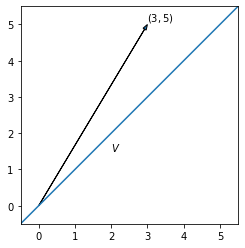

In [3]:
plt.axis('scaled')
plt.xlim(-0.5, 5.5)
plt.ylim(-0.5, 5.5)
plt.arrow(0, 0, 3, 5, head_width=0.1, length_includes_head=True)
plt.plot([-1, 6], [-1, 6])
plt.annotate(r'$V$', (2, 1.5))
plt.annotate(r'$(3, 5)$', (3, 5.1))
plt.show()

From above, our subspace is 1-dimensional, while our $\arr w  = \mat{3 \\ 5} \in \mathbb R^2$.
(Our basis would be $\set{\frac{1}{\sqrt 2} \mat{1 \\ 1}}$).

$\arr w_p$ would be $(\arr w \cdot \arr u_1) \arr u_1 = \frac{3 + 5}{\sqrt 2} \left(\frac{1}{\sqrt 2} \mat{1 \\ 1} \right) = \mat{4 \\ 4}$.

And $\arr w_n = \mat{3 \\ 5} - \mat{4 \\ 4} = \mat{-1 \\ 1}$.

Visually, it would be as per below:

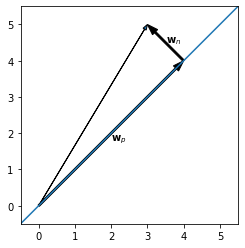

In [4]:
plt.axis('scaled')
plt.xlim(-0.5, 5.5)
plt.ylim(-0.5, 5.5)
plt.arrow(0, 0, 3, 5, head_width=0.1, length_includes_head=True)
plt.plot([-1, 6], [-1, 6])
plt.arrow(0, 0, 4, 4, width=0.05, head_width=0.2, length_includes_head=True,color='black')
plt.annotate(r'${\bf w}_p$', (2, 1.8))
plt.annotate(r'${\bf w}_n$', (3.5, 4.5))
plt.arrow(4, 4, -1, 1, width=0.05, head_width=0.2, length_includes_head=True,color='black')
plt.show()

## Gram-Schmidt process

Given some basis, it would be beneficial for us to construct an orthonormal basis that spans the same subspace, seeing previously that it is easier to work with orthonormal basis.

The **Gram-Schmidt process** allows us to do just that.

It is an iterative algorithm which produces us an orthogonal basis from some basis $S = \set{\arr u_1, \dots, \arr u_k}$:
1. Let $S' = \set{u_1}$
2. For each $\arr u_i$ for $2 \leq u \leq k$:
    1. Find $\arr w_p$ by projecting $\arr u_i$ onto $S'$
    2. Find $\arr w_n = \arr u_i - \arr w_p$
    3. Add $\arr w_n$ to $S'$
3. $S'$ will be the orthogonal basis

If we want an orthonormal basis, we simply normalize $S'$.

In [5]:
def norm(u):
    return np.sum(u ** 2)
def project(w:np.ndarray, S: [np.ndarray]) -> np.ndarray:
    return np.sum([np.dot(w, u) * u / norm(u) for u in S], axis=0)

In [6]:
def gram_schmidt(S: [np.ndarray]) -> [np.ndarray]:
    Sp = [S[0]]
    
    for u in S[1:]:
        v = u - project(u, Sp)
        Sp.append(v)
    
    return Sp

In [7]:
u1 = np.array([1, 2, 1])
u2 = np.array([1, 1, 1])
u3 = np.array([1, 1, 2])
gram_schmidt([u1, u2, u3])

[array([1, 2, 1]),
 array([ 0.33333333, -0.33333333,  0.33333333]),
 array([-0.5,  0. ,  0.5])]

Hence, one way of obtaining a orthogonal projection given some $\arr w$ and basis $S$, is to obtain an orthonormal projection via Gram-Schmidt process, then finding the projection using the orthonormal projection.

## Least squares approximation

Suppose that we have some experimental data, which consists of inputs $\arr A$ and outputs $\arr b$.

We wish to find the solution $\arr x$ such that $\arr {Ax} = \arr b$.

However, in real life, there are minute errors in the measurements which leads to there being no solution to the system of $\arr {Ax} = \arr b$.
For example, suppose that our theoretical system is as per below:
$$
x + y = 3 \\
2x + y = 4 \\
x + 2y = 5 \\
$$
where the solution is $x = 1, y = 2$.

In [8]:
A = np.array([1, 1, 2, 1, 1, 2]).reshape((3, 2))
b = np.array([3, 4, 5]).reshape((3, 1))

np.hstack(gauss_jordan_elim(A, b))

array([[ 1.,  0.,  1.],
       [-0.,  0.,  0.],
       [ 0.,  1.,  2.]])

However, even a slight error will cause there to be no solution to our system:
$$
x + y = 3 \\ 
2x + y = 4.1 \\ 
x + 2y = 5 \\ 
$$

In [9]:
b = np.array([3, 4.1, 5]).reshape((3, 1))

np.hstack(gauss_jordan_elim(A, b))

array([[ 1. ,  0. ,  1.1],
       [-0. ,  0. , -0.1],
       [ 0. ,  1. ,  2. ]])

Thus, finding the least squares approximation is trying to reconcile this issue, by finding the solution which fits the constraints the best.

We wish to find a consistent system $\arr {Ax} = \arr b'$ where $\arr b'$ is closest to $\arr b$.
Note that one such solution always exists, as $\arr b' = \arr 0$ will be consistent (though $\arr 0$ may not be the closest).

$\theorem$:
$\arr u$ is the least square solution to $\arr {Ax} = \arr b$ if and only if $\arr {Au}$ is the projection of $\arr b$ onto $Col(\arr A)$.

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        (Un-rigorously) we know that the projection of $\arr b$ onto $Col(\arr A)$ must give us the closest solution in the column space; because geometrically, the closest point would be orthogonal to the column space.
        <br>
        And we have seen previously that the projection will be in the column space.
        <br>
        Hence we know that $\arr b' = \arr {Au}$ must be the closest solution to $\arr b$.
            $$QED$$
    </div>
</details>

$\theorem$:
$\arr u$ is the least square solution to $\arr {Ax} = \arr b$ if and only if $\arr A^T \arr {Au} = \arr A ^T \arr b$.

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        Following the previous theorem, we know that the vector from $\arr b$ to $\arr b'$ must be orthogonal to the column space.
        Therefore, 
    $$
    \arr b' - \arr b \perp Col(\arr A)\\
    \Rightarrow \arr {Au} - \arr b \perp Col(\arr A) \\
    \Rightarrow \arr {Au} - \arr b \perp  span(\set{\arr u_1, \dots, \arr u_k}\\
    $$
    <a href="#Orthogonal-to-subspace"> Recall</a> that $\arr w \perp span (\set{\arr u_1, \dots, \arr u_k})$ if and only if $\arr w \in Null(\arr A^T)$.
    Hence,
    $$
    \Rightarrow \arr {Au} - \arr b \in Null(\arr A^T)\\
    \Rightarrow \arr A^T(\arr {Au} - \arr b) = \arr 0\\
    \Rightarrow \arr A^T\arr {Au} - \arr A^T \arr b = \arr 0\\
    \Rightarrow \arr A^T\arr {Au} = \arr A^T \arr b \\
    $$
        $$QED$$
    </div>
</details>

In [10]:
np.hstack(gauss_jordan_elim(A.T @ A, A.T @ b))

array([[1.        , 0.        , 1.06363636],
       [0.        , 1.        , 1.96363636]])

(Another example is [here](../neural_network/perceptron.ipynb#Example))

This also gives us a way of finding an orthogonal projection without constructing an orthonormal basis.

$\theorem$:
Given $S = \set{\arr u_1, \dots, \arr u_k}$ be a basis for $V \subseteq \mathbb R^n$, the orthogonal projection of $\arr w \in \mathbb R^n$ onto $V$ is 
$$
\arr A( \arr A^T \arr A) \inv \arr A^T \arr w
$$
where $\arr A = \mat{\arr u_1 & \arr u_2 & \cdots  & \arr u_k}$.

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
        Combining the above 2 theorems, we know that if $\arr u$ is the least square solution to $\arr {Ax} = \arr b$, then $\arr {Au}$ is a projection onto $Col(\arr A) = V$.
        And we know that $\arr u$ is the least square solution if and only if $\arr A^T \arr A \arr u = \arr A^T  \arr b$.
        $$
        \begin{align}
        \arr A^T \arr A \arr u &= \arr A^T  \arr b \\
        \arr u &= (\arr A^T \arr A) \inv  \arr A^T  \arr b \quad \text{$S$ is a basis, therefore $\arr A$ is invertible} \\ 
        \arr A \arr u &= \arr A(\arr A^T \arr A) \inv  \arr A^T  \arr b 
        \end{align}
        $$
        $$QED$$
    </div>
</details>

In [4]:
A = np.array([1, 1]).reshape((2, 1))
w = np.array([3, 5]).reshape((2, 1))

A @ np.linalg.inv(A.T @ A) @ A.T @ w

array([[4.],
       [4.]])

As per our previous example, we do also get $\mat{4 \\ 4}$ as the projection.